https://colab.research.google.com/drive/19uzAnbgyTVdskz-3RFh8Kv5R7o9sq7zc?usp=drive_link

In [1]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
img1_gray = cv2.imread("/content/drive/MyDrive/패턴인식/PR201910769/images/lane01.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/drive/MyDrive/패턴인식/PR201910769/images/lane01.jpg")
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

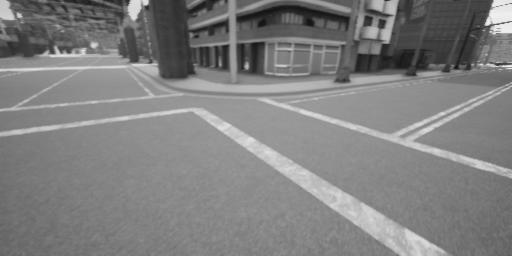

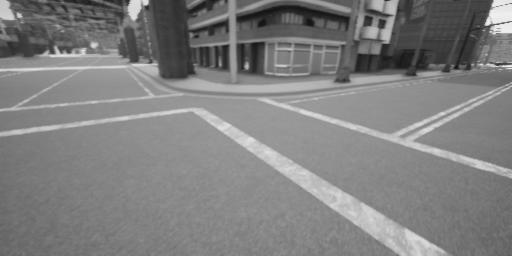

In [3]:
cv2_imshow(img1_gray)
cv2_imshow(img2_gray)

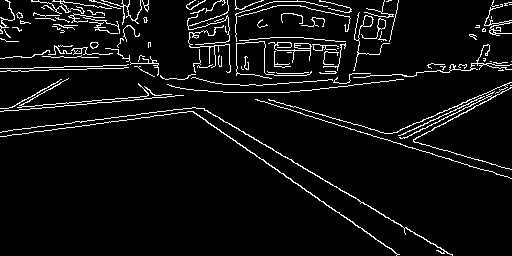

In [4]:
canny = cv2.Canny(img2_gray, 100, 200)
cv2_imshow(canny)

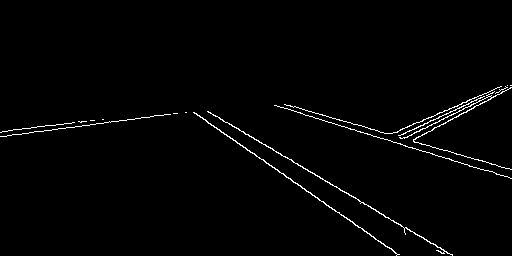

In [5]:
def ROI_selection(img, vertices):
  mask = np.zeros_like(img)
  cv2.fillPoly(mask, vertices, (255))
  return cv2.bitwise_and(img, mask)

height, width = img2.shape[:2]
vertices = np.array([[(0, height//2),
                      (0, height),
                      (width, height),
                      (width, height//3)]])

masking = ROI_selection(canny, vertices)

cv2_imshow(masking)

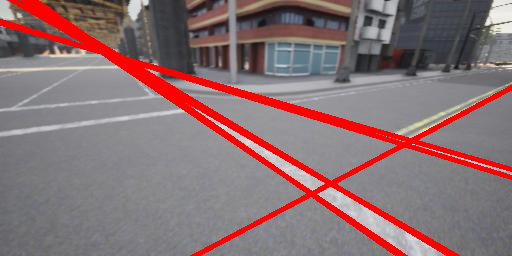

In [6]:
lines = cv2.HoughLines(masking, rho=1, theta=np.pi/180, threshold=100)
result = np.copy(img2)

if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(result, pt1, pt2, (0,0,255), 3)

cv2_imshow(result)

In [7]:
lines

array([[[-20.       ,   2.1816616]],

       [[-13.       ,   2.1118484]],

       [[ -6.       ,   2.0943952]],

       [[ 20.       ,   1.8675023]],

       [[ 22.       ,   1.850049 ]],

       [[317.       ,   1.0821041]],

       [[-14.       ,   2.1642082]]], dtype=float32)

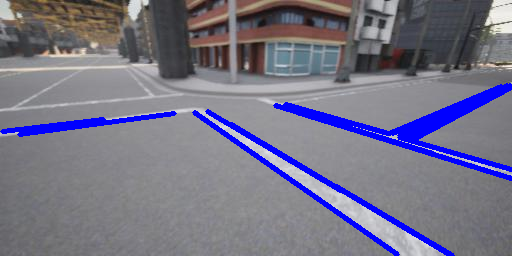

In [8]:
linesp = cv2.HoughLinesP(masking, rho=1, theta=np.pi/180, threshold=30, minLineLength=10, maxLineGap=10)
result = np.copy(img2)

for line in linesp:
    x1, y1, x2, y2 = line[0]
    cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 3)

cv2_imshow(result)

In [9]:
linesp

array([[[194, 112, 397, 254]],

       [[231, 124, 447, 253]],

       [[399, 137, 511, 169]],

       [[ 19, 134, 174, 113]],

       [[275, 105, 432, 153]],

       [[297, 112, 511, 178]],

       [[413, 139, 511,  87]],

       [[407, 137, 510,  85]],

       [[207, 111, 340, 190]],

       [[399, 135, 507,  85]],

       [[389, 133, 501,  86]],

       [[  2, 131, 103, 119]],

       [[285, 104, 388, 133]],

       [[336, 186, 452, 255]],

       [[392, 133, 466, 102]],

       [[405, 137, 473, 103]]], dtype=int32)

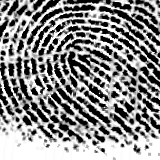

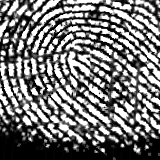

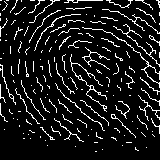

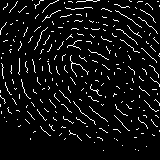

In [10]:
from skimage.morphology import skeletonize
# 이미지 읽어서 1-channel을 갖는 그레이스케일 이미지로 변환

img = cv2.imread("/content/drive/MyDrive/패턴인식/PR201910769/images/fingerprint01.bmp")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



# 지문에 해당하는 부분이 255, 배경이 0이 되도록 이미지 화소값 반전

inverted_gray = 255 - gray



# 옵션1) OpenCV 패키지를 이용한 세선화 알고리즘

thinned_opencv = cv2.ximgproc.thinning(inverted_gray)  # thinningType 기본값: cv2.ximgproc.THINNING_ZHANGSUEN

"""

다음과 같이 thinning 알고리즘을 명시해 줄 수 있음 (기본값: cv2.ximgproc.THINNING_ZHANGSUEN)



opencv_ZHANGSUEN = cv2.ximgproc.thinning(inverted_gray, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

opencv_GUOHALL = cv2.ximgproc.thinning(inverted_gray, thinningType=cv2.ximgproc.THINNING_GUOHALL)

"""



# 옵션2) scikit-image 패키지를 이용한 세선화 알고리즘

thinned_skimage = skeletonize(inverted_gray/255.0)

"""

주의) skeletonize()의 결과는 0.0~1.0 사이의 값으로 리턴되므로, 추후 이미지 처리 시 유의해야 함

다음과 같이 skeletonize 알고리즘을 명시해 줄 수 있음 (기본값: 'zhang')



thinned_skimage = skeletonize(inverted_gray/255.0, method='zhang')

thinned_skimage = skeletonize(inverted_gray/255.0, method='lee')

"""



# 결과 시각화

cv2_imshow(gray)

cv2_imshow(inverted_gray)

cv2_imshow(thinned_opencv)

cv2_imshow((thinned_skimage*255).astype('uint8'))

## 과제

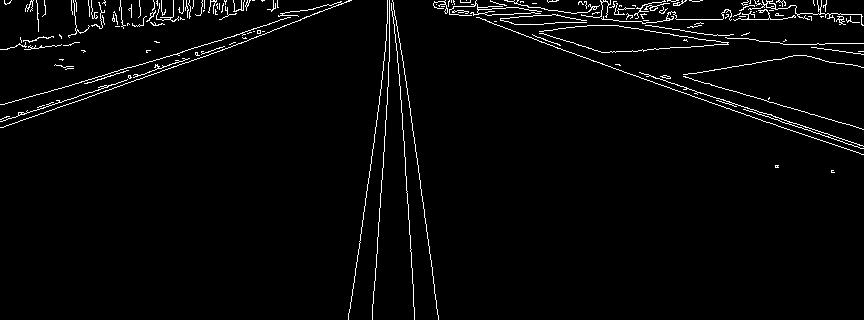

In [11]:
img = cv2.imread('/content/drive/MyDrive/패턴인식/PR201910769/images/lane03.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(img_gray, 100, 200)
cv2_imshow(canny)

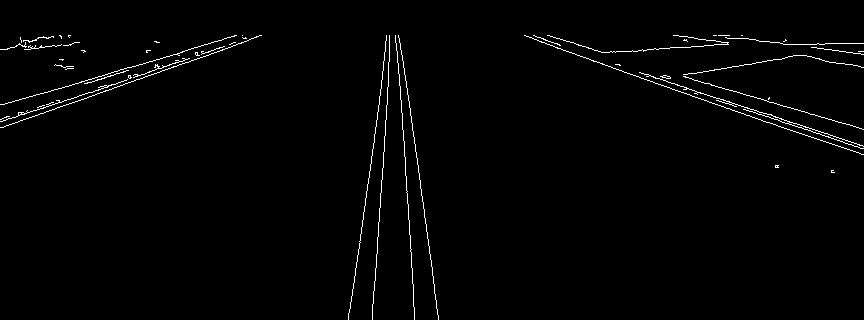

In [12]:
height, width = img.shape[:2]
vertices = np.array([[(0, (height//9)),
                      (0, height),
                      (width, height),
                      (width, (height//9))]])

masking = ROI_selection(canny, vertices)

cv2_imshow(masking)

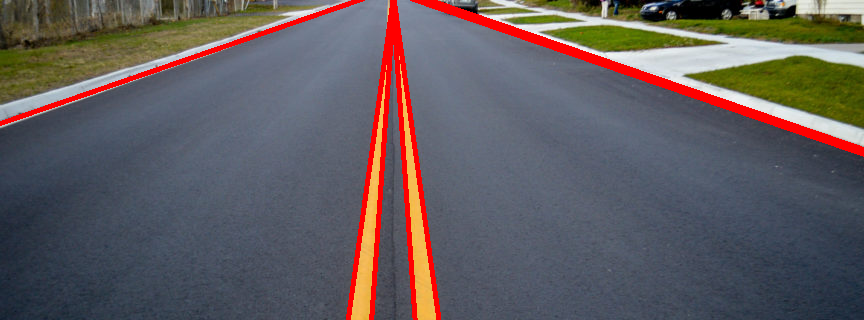

In [13]:
lines = cv2.HoughLines(masking, rho=1, theta=np.pi/180, threshold=150)
result = np.copy(img)

if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(result, pt1, pt2, (0,0,255), 3)

cv2_imshow(result)

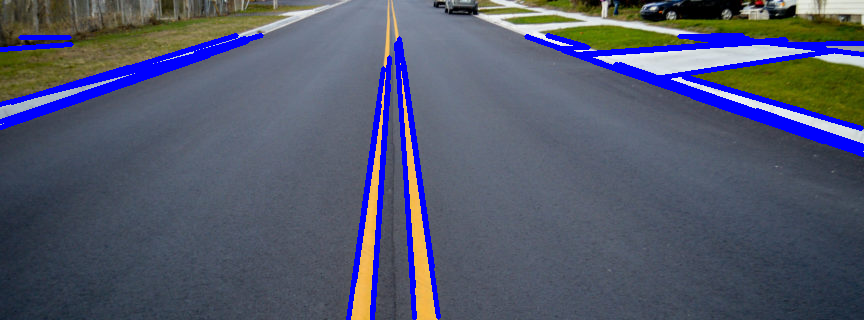

In [14]:
linesp = cv2.HoughLinesP(masking, rho=1, theta=np.pi/180, threshold=30, minLineLength=30, maxLineGap=50)
result = np.copy(img)

for line in linesp:
    x1, y1, x2, y2 = line[0]
    cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 3)

cv2_imshow(result)

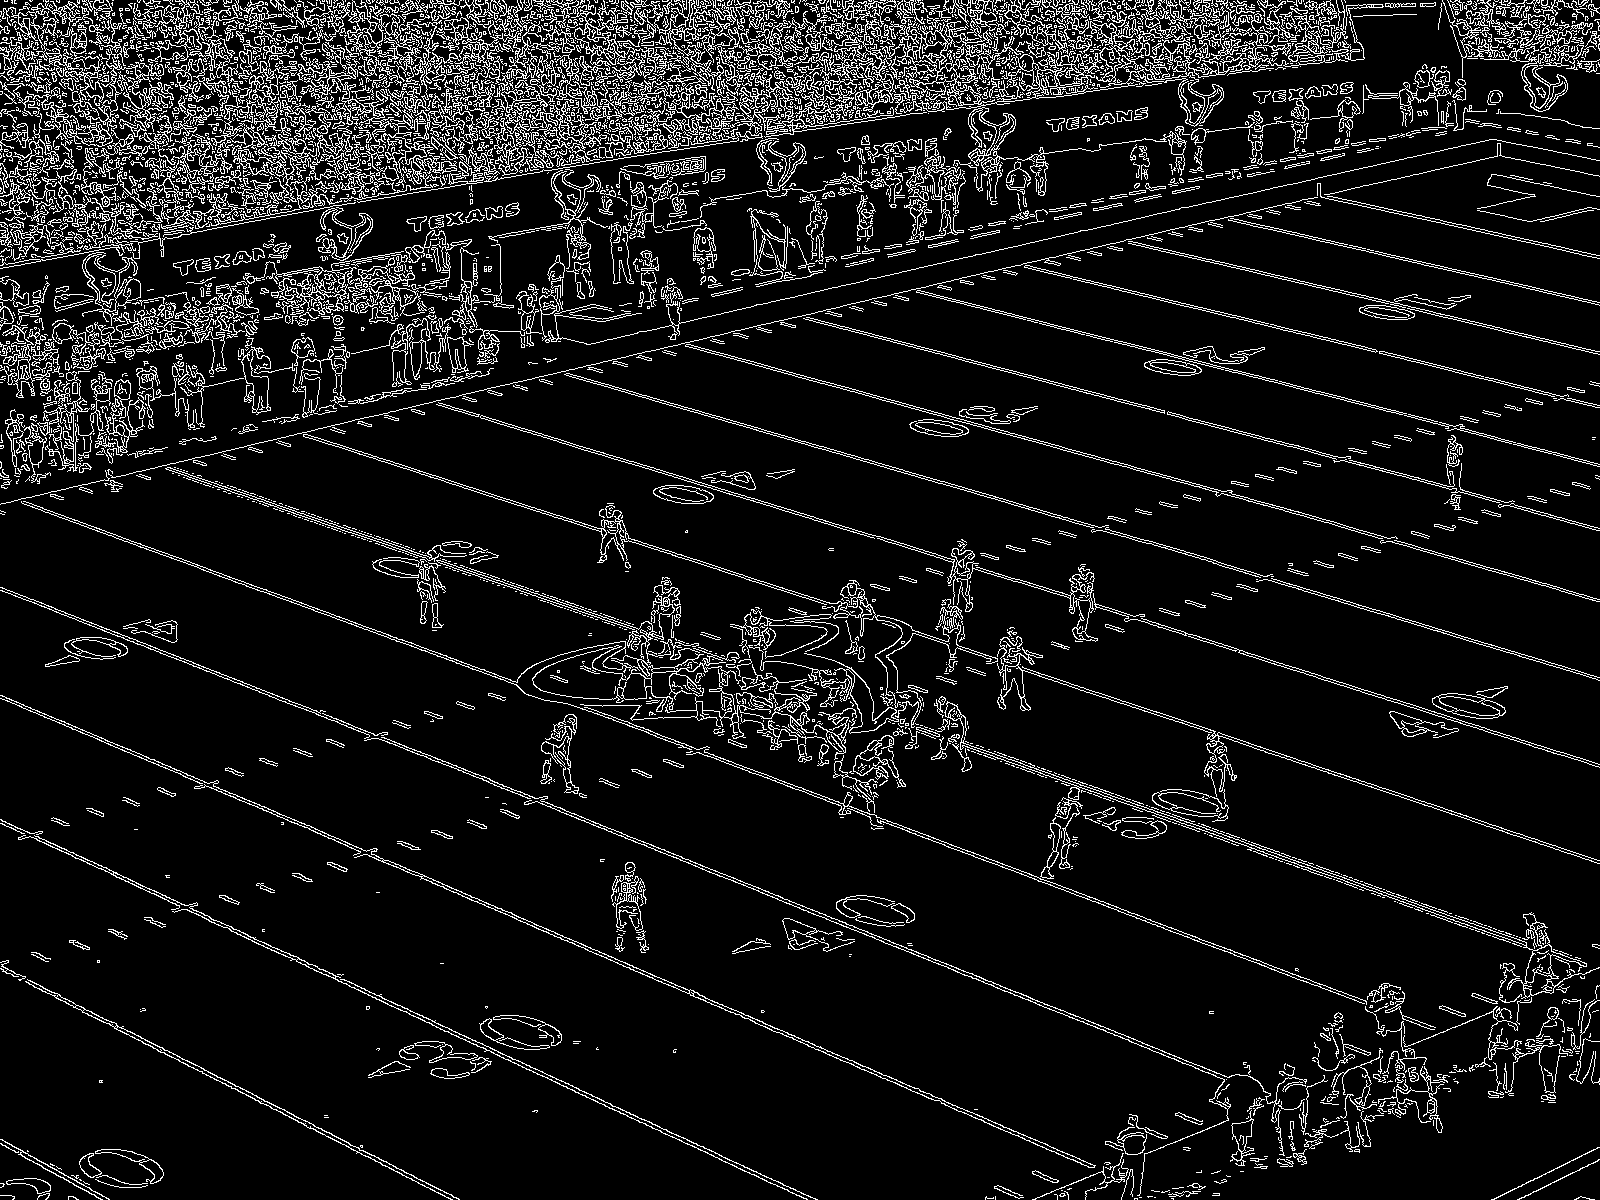

In [16]:
img = cv2.imread('/content/drive/MyDrive/패턴인식/PR201910769/images/football.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(img_gray, 100, 200)
cv2_imshow(canny)

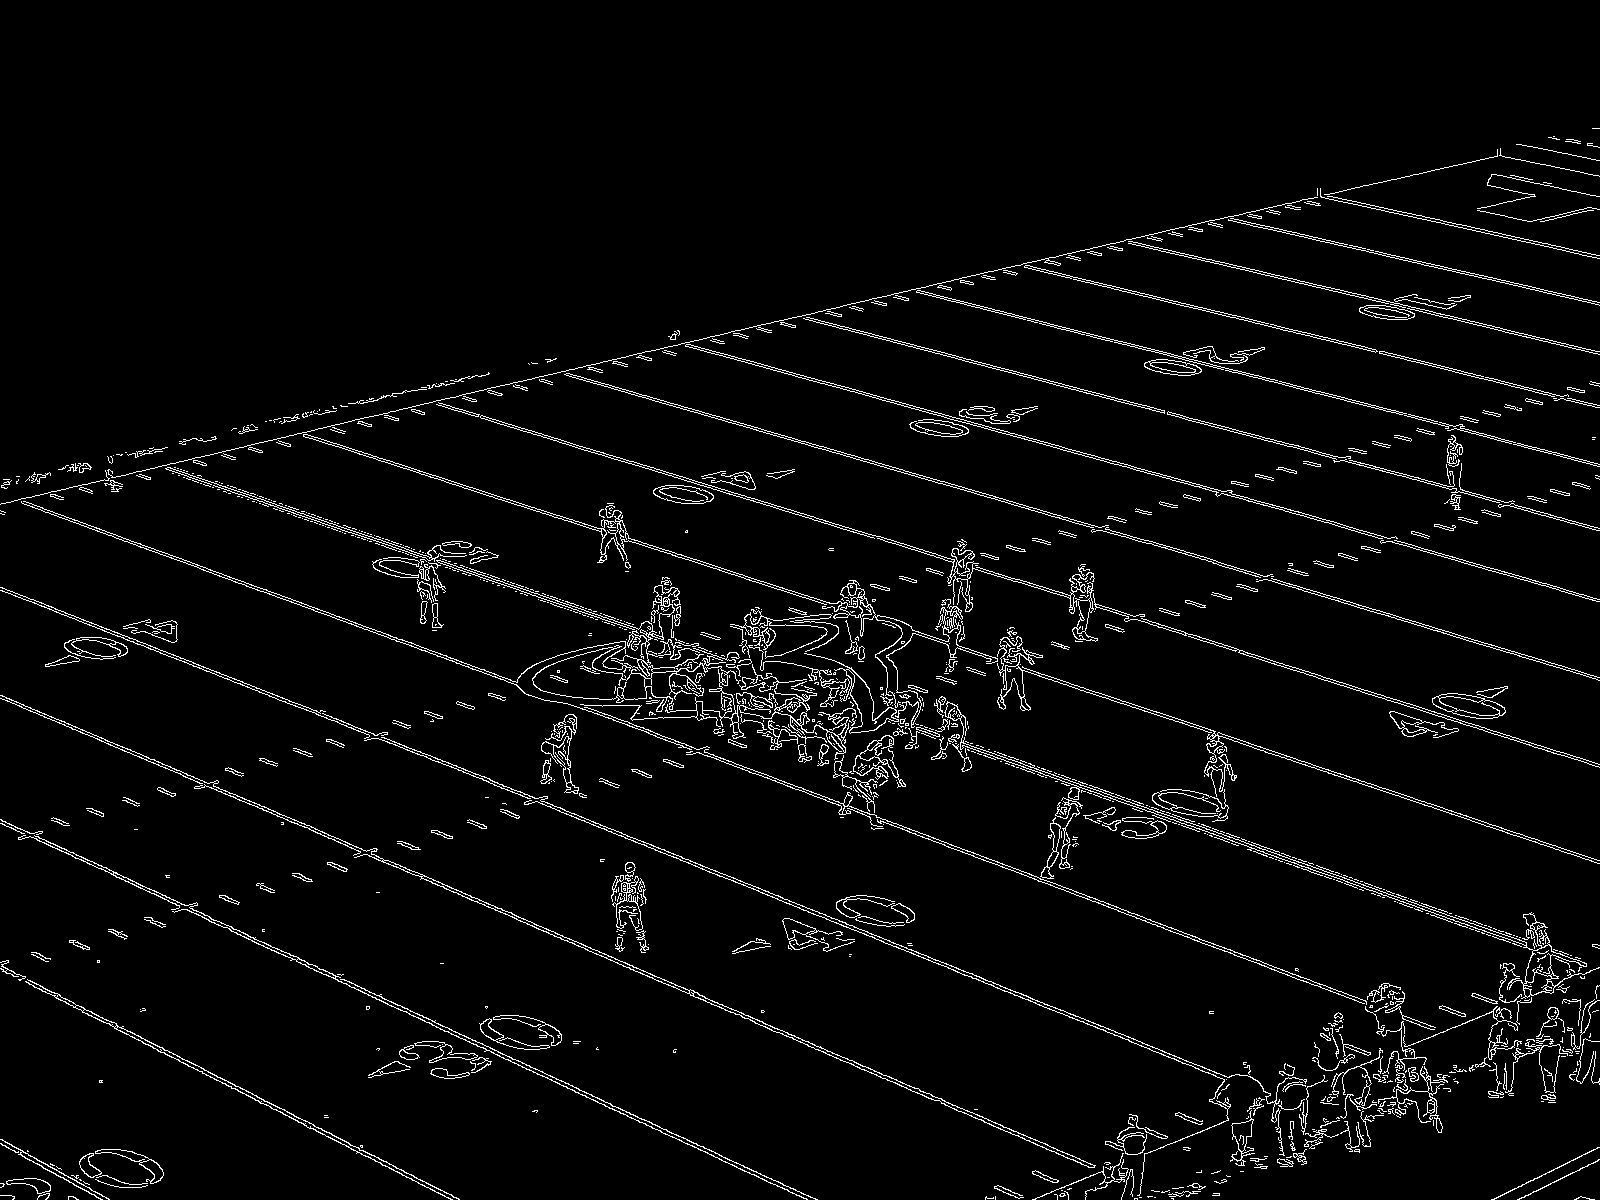

In [17]:
height, width = img.shape[:2]
vertices = np.array([[(0, (height//5)*2),
                      (0, height),
                      (width, height),
                      (width, (height//19)*2)]])

masking = ROI_selection(canny, vertices)

cv2_imshow(masking)

In [18]:
lines = cv2.HoughLines(masking, rho=1, theta=np.pi/180, threshold=300)
result = np.copy(img)

if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(result, pt1, pt2, (0,0,255), 3)

cv2_imshow(result)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
linesp = cv2.HoughLinesP(masking, rho=1, theta=np.pi/180, threshold=60, minLineLength=50, maxLineGap=10)
result = np.copy(img)

for line in linesp:
    x1, y1, x2, y2 = line[0]
    cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 3)

cv2_imshow(result)

Output hidden; open in https://colab.research.google.com to view.